In [156]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
import plotly as py
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

# File to Load (Remember to Change These)
d2015 = "Sheets/2015.csv"
d2016 = "Sheets/2016.csv"
d2017 = "Sheets/2017.csv"
d2018 = "Sheets/2018.csv"
d2019 = "Sheets/2019.csv"

# Read yearly data files
data_15 = pd.read_csv(d2015)
data_16 = pd.read_csv(d2016)
data_17 = pd.read_csv(d2017)
data_18 = pd.read_csv(d2018)
data_19 = pd.read_csv(d2019)



In [157]:
data_15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [158]:
# year 2015 extract columns and rearrange columns

df15c = data_15.loc[:,['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)']]

#rename column
df15new= df15c.rename(columns={"Happiness Rank":"Overall rank", "Country":"Country or region","Happiness Score":"Score","Economy (GDP per Capita)":"GDP per capita", "Family":"Social support", "Health (Life Expectancy)":"Healthy life expectancy", "Freedom":"Freedom to make life choices", "Generosity":"Generosity", "Trust (Government Corruption)": "Perceptions of corruption"})


df15new['Country or region'].replace(['Hong Kong S.A.R., China','Taiwan Province of China','Trinidad and Tobago','North Cyprus','Somaliland region'],['Hong Kong','Taiwan','Trinidad & Tobago','Northern Cyprus','Somaliland Region'], inplace = True)
df15new

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [159]:
data_16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [160]:
#year 2016 extract columns and rearrange columns

df16c = data_16.loc[:,['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)']]

#rename column
df16new = df16c.rename(columns={"Happiness Rank":"Overall rank", "Country":"Country or region","Happiness Score":"Score","Economy (GDP per Capita)":"GDP per capita", "Family":"Social support", "Health (Life Expectancy)":"Healthy life expectancy", "Freedom":"Freedom to make life choices", "Generosity":"Generosity", "Trust (Government Corruption)": "Perceptions of corruption"})

#replacing name change for HK and Taiwan
df16new['Country or region'].replace(['Hong Kong S.A.R., China','Taiwan Province of China','Trinidad and Tobago','North Cyprus','Somaliland region'],['Hong Kong','Taiwan','Trinidad & Tobago','Northern Cyprus','Somaliland Region'], inplace = True)
df16new

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004
...,...,...,...,...,...,...,...,...,...
152,153,Benin,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681
153,154,Afghanistan,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112
154,155,Togo,3.303,0.28123,0.00000,0.24811,0.34678,0.17517,0.11587
155,156,Syria,3.069,0.74719,0.14866,0.62994,0.06912,0.48397,0.17233


In [161]:
data_17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [162]:
#year 2017 extract columns and rearrange columns

df17c = data_17.loc[:,['Happiness.Rank', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.']]

#rename column
df17new = df17c.rename(columns={"Happiness.Rank":"Overall rank", "Country":"Country or region","Happiness.Score":"Score","Economy..GDP.per.Capita.":"GDP per capita", "Family":"Social support", "Health..Life.Expectancy.":"Healthy life expectancy", "Freedom":"Freedom to make life choices", "Generosity":"Generosity", "Trust..Government.Corruption.": "Perceptions of corruption"})

#replacing name change for HK and Taiwan

df17new['Country or region'].replace(['Hong Kong S.A.R., China','Taiwan Province of China','Trinidad and Tobago','North Cyprus','Somaliland region'],['Hong Kong','Taiwan','Trinidad & Tobago','Northern Cyprus','Somaliland Region'], inplace = True)
df17new

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...,...,...
150,151,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220
151,152,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347
152,153,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035
153,154,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148


In [163]:
df1516 = pd.merge(df15new, df16new, how="outer", on = "Country or region", suffixes=("_15", "_16"))
df1516

,Overall rank_15,Country or region,Score_15,GDP per capita_15,Social support_15,Healthy life expectancy_15,Freedom to make life choices_15,Generosity_15,Perceptions of corruption_15,Overall rank_16,Score_16,GDP per capita_16,Social support_16,Healthy life expectancy_16,Freedom to make life choices_16,Generosity_16,Perceptions of corruption_16
0,1.0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.0,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
1,2.0,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,3.0,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
2,3.0,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.0,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
3,4.0,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,4.0,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
4,5.0,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,6.0,7.404,1.44015,1.09610,0.82760,0.57370,0.44834,0.31329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,NaN,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,7.039,1.35943,1.08113,0.77758,0.46823,0.22202,0.12275
159,NaN,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,5.956,0.87616,0.68655,0.45569,0.51231,0.23684,0.10771
160,NaN,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,5.440,0.00000,0.33613,0.11466,0.56778,0.27225,0.31180
161,NaN,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,4.574,0.93287,0.70362,0.34745,0.48614,0.07795,0.10398


In [164]:
df1718 = pd.merge(df17new, data_18, how="outer", on = "Country or region", suffixes=("_17", "_18"))
df1718

,Overall rank_17,Country or region,Score_17,GDP per capita_17,Social support_17,Healthy life expectancy_17,Freedom to make life choices_17,Generosity_17,Perceptions of corruption_17,Overall rank_18,Score_18,GDP per capita_18,Social support_18,Healthy life expectancy_18,Freedom to make life choices_18,Generosity_18,Perceptions of corruption_18
0,1.0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
1,2.0,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
2,3.0,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
3,4.0,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357
4,5.0,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152.0,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,150,3.462,0.689,0.382,0.539,0.088,0.376,0.144
152,153.0,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154.0,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,156,2.905,0.091,0.627,0.145,0.065,0.149,0.076
154,155.0,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [165]:
df17_19 = pd.merge(df1718, data_19, how="outer", on = "Country or region", suffixes=("", "_19"))
df17_19

,Overall rank_17,Country or region,Score_17,GDP per capita_17,Social support_17,Healthy life expectancy_17,Freedom to make life choices_17,Generosity_17,Perceptions of corruption_17,Overall rank_18,...,Generosity_18,Perceptions of corruption_18,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.0,...,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341
1,2.0,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,3.0,...,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3.0,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,4.0,...,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118
3,4.0,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,5.0,...,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343
4,5.0,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,1.0,...,0.202,0.393,1.0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,NaN,Laos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,...,0.230,0.174,105.0,4.796,0.764,1.030,0.551,0.547,0.266,0.164
156,NaN,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,84.0,5.274,0.983,1.294,0.838,0.345,0.185,0.034
157,NaN,Gambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,120.0,4.516,0.308,0.939,0.428,0.382,0.269,0.167
158,NaN,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,135.0,4.212,0.811,1.149,0.000,0.313,0.074,0.135


In [166]:
df_all= pd.merge(df1516, df17_19, how="outer", on = "Country or region", suffixes=("", ""))


df_all = df_all.rename(columns={"Overall rank":"Overall rank_19","Score":"Score_19","GDP per capita":"GDP per capita_19", "Social support":"Social support_19", "Healthy life expectancy":"Healthy life expectancy_19", "Freedom to make life choices":"Freedom to make life choices_19", "Generosity":"Generosity_19", "Perceptions of corruption": "Perceptions of corruption"})

df_all

,Overall rank_15,Country or region,Score_15,GDP per capita_15,Social support_15,Healthy life expectancy_15,Freedom to make life choices_15,Generosity_15,Perceptions of corruption_15,Overall rank_16,...,Generosity_18,Perceptions of corruption_18,Overall rank_19,Score_19,GDP per capita_19,Social support_19,Healthy life expectancy_19,Freedom to make life choices_19,Generosity_19,Perceptions of corruption
0,1.0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.0,...,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,2.0,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,3.0,...,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,3.0,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.0,...,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,4.0,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,4.0,...,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,5.0,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,6.0,...,0.321,0.291,9.0,7.278,1.365,1.505,1.039,0.584,0.285,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,...,0.238,0.282,112.0,4.668,0.000,0.698,0.268,0.559,0.243,0.270
161,NaN,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,...,0.051,0.064,113.0,4.639,0.879,1.313,0.477,0.401,0.070,0.056
162,NaN,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,...,0.224,0.106,156.0,2.853,0.306,0.575,0.295,0.010,0.202,0.091
163,NaN,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,84.0,5.274,0.983,1.294,0.838,0.345,0.185,0.034


In [167]:
df_all.dropna(how='any',inplace=True)
df_all

,Overall rank_15,Country or region,Score_15,GDP per capita_15,Social support_15,Healthy life expectancy_15,Freedom to make life choices_15,Generosity_15,Perceptions of corruption_15,Overall rank_16,...,Generosity_18,Perceptions of corruption_18,Overall rank_19,Score_19,GDP per capita_19,Social support_19,Healthy life expectancy_19,Freedom to make life choices_19,Generosity_19,Perceptions of corruption
0,1.0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.0,...,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,2.0,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,3.0,...,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,3.0,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.0,...,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,4.0,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,4.0,...,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,5.0,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,6.0,...,0.321,0.291,9.0,7.278,1.365,1.505,1.039,0.584,0.285,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154.0,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,152.0,...,0.200,0.444,152.0,3.334,0.359,0.711,0.614,0.555,0.217,0.411
154,155.0,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,153.0,...,0.163,0.067,102.0,4.883,0.393,0.437,0.397,0.349,0.175,0.082
155,156.0,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,156.0,...,0.376,0.144,149.0,3.462,0.619,0.378,0.440,0.013,0.331,0.141
156,157.0,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,157.0,...,0.149,0.076,145.0,3.775,0.046,0.447,0.380,0.220,0.176,0.180


In [168]:
df_all.to_csv("Sheets/world_happiness.csv", index=False, header=True)

In [169]:
df_all['average_score_all'] = df_all[['Score_15', 'Score_16','Score_17', 'Score_18','Score_19']].mean(axis=1)
df_all

,Overall rank_15,Country or region,Score_15,GDP per capita_15,Social support_15,Healthy life expectancy_15,Freedom to make life choices_15,Generosity_15,Perceptions of corruption_15,Overall rank_16,...,Perceptions of corruption_18,Overall rank_19,Score_19,GDP per capita_19,Social support_19,Healthy life expectancy_19,Freedom to make life choices_19,Generosity_19,Perceptions of corruption,average_score_all
0,1.0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.0,...,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343,7.5114
1,2.0,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,3.0,...,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5110
2,3.0,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.0,...,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.5460
3,4.0,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,4.0,...,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.5410
4,5.0,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,6.0,...,0.291,9.0,7.278,1.365,1.505,1.039,0.584,0.285,0.308,7.3506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154.0,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,152.0,...,0.444,152.0,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3.4386
154,155.0,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,153.0,...,0.067,102.0,4.883,0.393,0.437,0.397,0.349,0.175,0.082,3.9010
155,156.0,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,156.0,...,0.144,149.0,3.462,0.619,0.378,0.440,0.013,0.331,0.141,3.2922
156,157.0,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,157.0,...,0.076,145.0,3.775,0.046,0.447,0.380,0.220,0.176,0.180,3.0790


In [170]:
df_all['average_rank_all'] = df_all[['Overall rank_15', 'Overall rank_16','Overall rank_17', 'Overall rank_18','Overall rank_19']].mean(axis=1)
df_all

,Overall rank_15,Country or region,Score_15,GDP per capita_15,Social support_15,Healthy life expectancy_15,Freedom to make life choices_15,Generosity_15,Perceptions of corruption_15,Overall rank_16,...,Overall rank_19,Score_19,GDP per capita_19,Social support_19,Healthy life expectancy_19,Freedom to make life choices_19,Generosity_19,Perceptions of corruption,average_score_all,average_rank_all
0,1.0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.0,...,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343,7.5114,3.6
1,2.0,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,3.0,...,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5110,3.2
2,3.0,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.0,...,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.5460,2.2
3,4.0,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,4.0,...,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.5410,2.8
4,5.0,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,6.0,...,9.0,7.278,1.365,1.505,1.039,0.584,0.285,0.308,7.3506,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154.0,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,152.0,...,152.0,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3.4386,152.0
154,155.0,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,153.0,...,102.0,4.883,0.393,0.437,0.397,0.349,0.175,0.082,3.9010,137.8
155,156.0,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,156.0,...,149.0,3.462,0.619,0.378,0.440,0.013,0.331,0.141,3.2922,152.6
156,157.0,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,157.0,...,145.0,3.775,0.046,0.447,0.380,0.220,0.176,0.180,3.0790,153.8


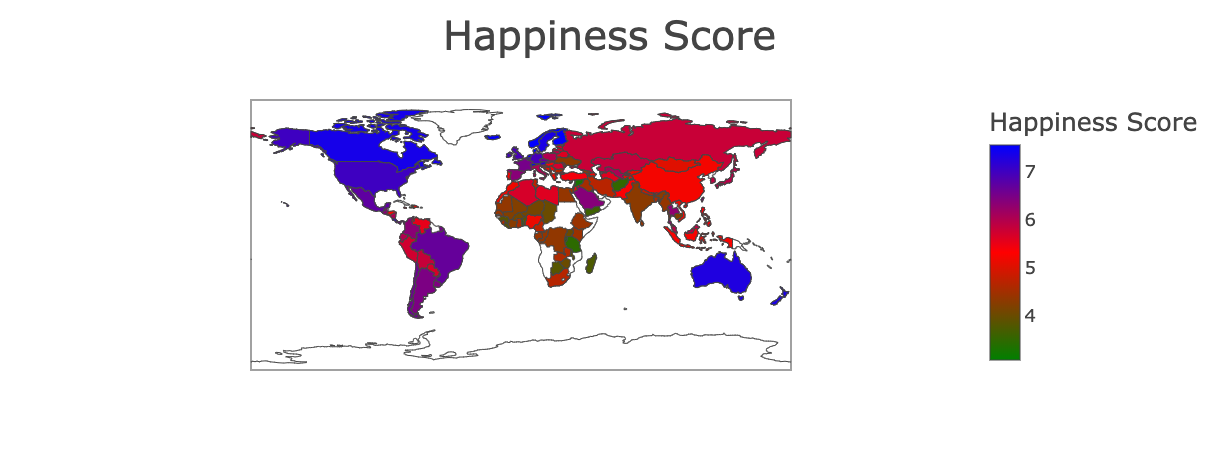

In [172]:
data = dict (
    type = 'choropleth',
    locations = df_all['Country or region'],
    locationmode='country names',
    colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']],
    z=df_all['average_score_all'],
    text = df_all['Country or region'],
        colorbar = dict(
        title = 'Average Happiness Score', 
        titlefont=dict(size=25),
        tickfont=dict(size=18)))

layout = dict(
    title = 'Happiness Score',
    titlefont = dict(size=40),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
        ))

map = go.Figure(data=[data],layout = layout)
py.offline.plot(map)
iplot(map, validate=False)


In [ ]:
df_all[['Country or region', 'average_GDP_all','average_score_all']].sort_values(by = 'average_GDP_all',
            ascending = False).head(10)